In [163]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as fit

In [301]:
df = pd.read_csv("GlobalLandTemperaturesByState.csv")
df = df[['dt', 'AverageTemperature', 'State']]
df['Year'] = pd.to_datetime(df['dt']).dt.year
df = df[df['Year'] > 2000]
df = df[df['State'].isin(['Wyoming', 'Nebraska', 'South Dakota'])]
print(df)

                dt  AverageTemperature     State  Year
350773  2001-01-01              -2.592  Nebraska  2001
350774  2001-02-01              -5.575  Nebraska  2001
350775  2001-03-01               2.077  Nebraska  2001
350776  2001-04-01              10.431  Nebraska  2001
350777  2001-05-01              15.878  Nebraska  2001
...            ...                 ...       ...   ...
626435  2013-05-01              10.607   Wyoming  2013
626436  2013-06-01              16.267   Wyoming  2013
626437  2013-07-01              20.222   Wyoming  2013
626438  2013-08-01              19.621   Wyoming  2013
626439  2013-09-01              15.811   Wyoming  2013

[459 rows x 4 columns]


In [303]:
df['Date'] = pd.to_datetime(df['dt'])
grouped = df.groupby('Date')['AverageTemperature'].mean().reset_index()
grouped.columns = ['Date', 'AverageTemperature']

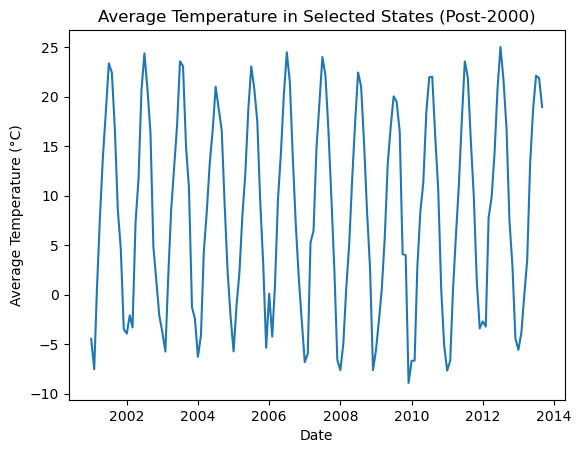

In [305]:
plt.plot(grouped['Date'], grouped['AverageTemperature'])
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.title('Average Temperature in Selected States (Post-2000)')
plt.show()


In [309]:
grouped['NumericDate'] = (grouped['Date'] - grouped['Date'].min()).dt.days

In [311]:
import numpy as np
from scipy.optimize import curve_fit

def model(x, a, b, c, d):
    return a * np.sin(b * x + c) + d

initial_guess = [10, 2 * np.pi / 365, 0, 20]

x_data = grouped['NumericDate']
y_data = grouped['AverageTemperature']
params, covariance = curve_fit(model, x_data, y_data, p0=initial_guess)


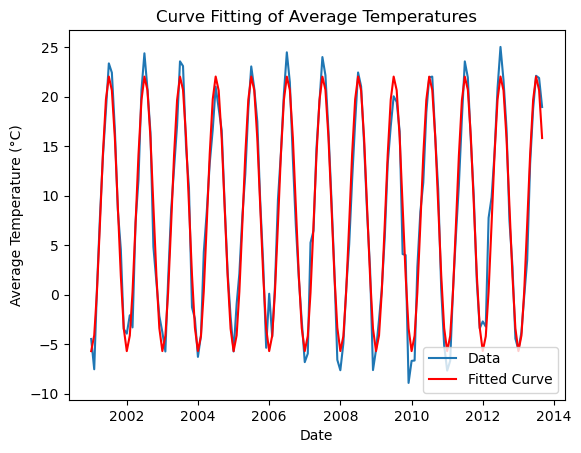

In [313]:
fitted_y = model(x_data, *params)
plt.plot(grouped['Date'], y_data, label='Data')
plt.plot(grouped['Date'], fitted_y, label='Fitted Curve', color='red')
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.title('Curve Fitting of Average Temperatures')
plt.legend()
plt.show()


In [327]:
errors = np.sqrt(np.diag(covariance))
print(errors)

[2.26500241e-01 1.22890061e-05 3.28148202e-02 1.60698472e-01]


In [329]:
import random
data1 = [random.randint(0, 200) for _ in range(50)]
data2 = [random.randint(0, 200) for _ in range(50)]
data3 = [random.randint(0, 200) for _ in range(50)]


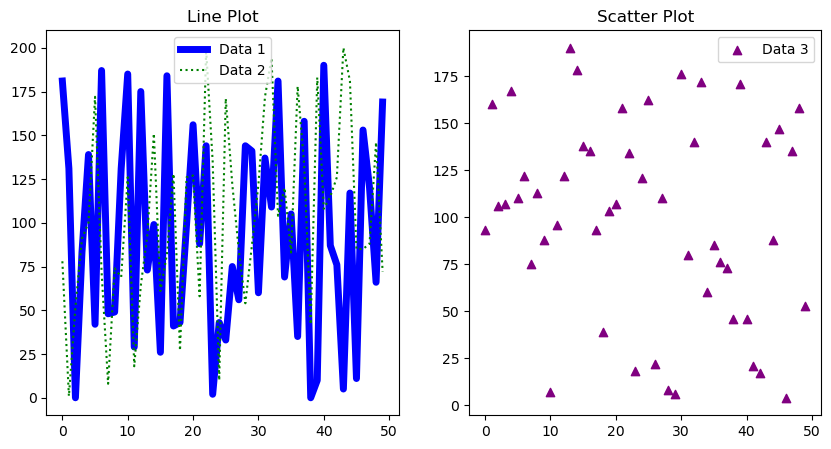

In [333]:
fig, axs = plt.subplots(1,2,figsize=(10,5))
#left
axs[0].plot(data1, label = "Data 1", linewidth=5, color= "blue")
axs[0].plot(data2, label= "Data 2", linestyle= 'dotted', color = 'green')
axs[0].set_title("Line Plot")
axs[0].legend()

#right
axs[1].scatter(range(len(data3)), data3, color='purple', marker='^', label='Data 3')
axs[1].set_title('Scatter Plot')
axs[1].legend()

plt.show()

In [335]:
N_values = [10, 1000, 100000, 1000000]
for N in N_values:
    x = np.random.rand(N)
    y = np.random.rand(N)
    inside_circle = np.sqrt(x**2 + y**2) <= 1
    pi_estimate = 4 * np.sum(inside_circle) / N
    print(f"N={N}, π ≈ {pi_estimate}")


N=10, π ≈ 3.2
N=1000, π ≈ 3.184
N=100000, π ≈ 3.14408
N=1000000, π ≈ 3.142948


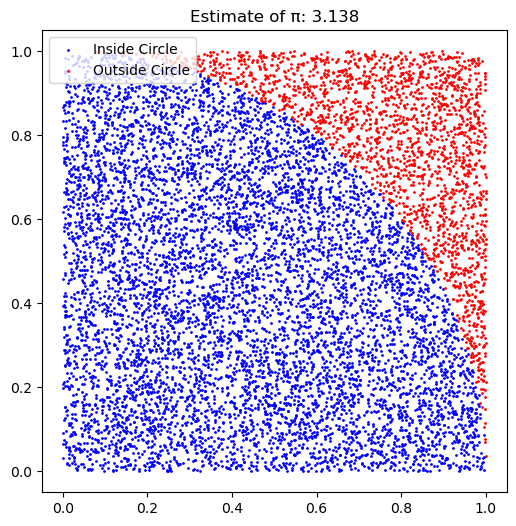

In [337]:
N = 10000
x = np.random.rand(N)
y = np.random.rand(N)
inside_circle = np.sqrt(x**2 + y**2) <= 1

plt.figure(figsize=(6, 6))
plt.scatter(x[inside_circle], y[inside_circle], color='blue', s=1, label='Inside Circle')
plt.scatter(x[~inside_circle], y[~inside_circle], color='red', s=1, label='Outside Circle')
plt.title(f'Estimate of π: {4 * np.sum(inside_circle) / N}')
plt.legend()
plt.show()
